<a href="https://colab.research.google.com/github/jcsnuesi/visualizacion_data/blob/main/Ejercicio_de_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Global import of cocoa beans.xlsx')
df

,Region,Year,Import in tonnes
0,Asia & Oceania,2015.0,565000.0
1,Asia & Oceania,2016.0,592000.0
2,Asia & Oceania,2017.0,866000.0
3,Asia & Oceania,2018.0,927000.0
4,Asia & Oceania,2019.0,924000.0
5,Europe,2015.0,1997000.0
6,Europe,2016.0,2219000.0
7,Europe,2017.0,2444000.0
8,Europe,2018.0,2554000.0
9,Europe,2019.0,2500000.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            15 non-null     object 
 1   Year              15 non-null     float64
 2   Import in tonnes  15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 488.0+ bytes


In [237]:
df1 = df
df1.Year = df1.Year.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            15 non-null     object 
 1   Year              15 non-null     int64  
 2   Import in tonnes  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes


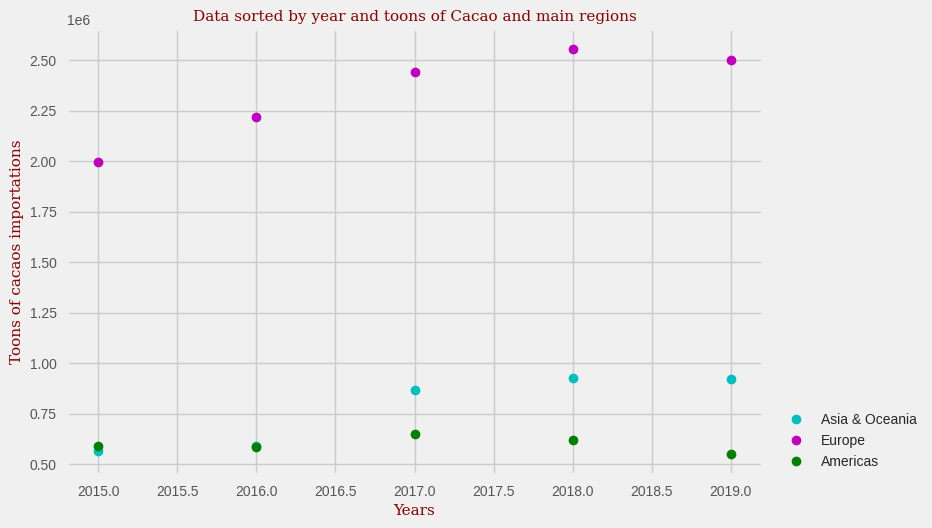

In [238]:
asia_oceania =  df1['Region'] == 'Asia & Oceania'
europe =  df1['Region'] == 'Europe'
americas =  df1['Region'] == 'Americas'

plt.style.use('fivethirtyeight')
plt.figure(dpi=100)
plt.plot(df1.loc[asia_oceania,'Year'],df1.loc[asia_oceania,'Import in tonnes'], 'co', label='Asia & Oceania')
plt.plot(df1.loc[europe,'Year'],df1.loc[europe,'Import in tonnes'], 'mo', label='Europe')
plt.plot(df1.loc[americas,'Year'],df1.loc[americas,'Import in tonnes'], 'go', label='Americas')
font = {'family': 'serif', 'color':  'darkred','weight': 'normal', 'size': 11,}
plt.xlabel('Years', fontdict=font)
plt.ylabel('Toons of cacaos importations',fontdict=font)
plt.title('Data sorted by year and toons of Cacao and main regions', fontdict=font)
plt.legend()
plt.legend(loc=(1.02,0))
plt.show()

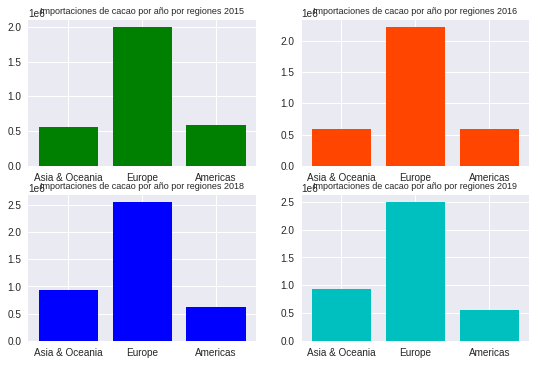

In [324]:
years = [2015,2016,2017,2018,2019]
colores = ['green','orangered','red','blue','c']
mead_by_yrs = []

i = 0
r = 0
c = 0
fig, axis =  plt.subplots(nrows=2, ncols=2) 
while i < 5:
  yr_c = df1.Year == years[i]
  show_c = colores[i]
  if c <= len(axis)-1:
    
    axis[r,c].bar(df1.loc[yr_c,'Region'].unique(),df1.loc[yr_c,'Import in tonnes'], label=years[i], color=show_c) 
    axis[r,c].set_title(f"Importaciones de cacao por año por regiones {years[i]}", fontsize=9)
    
    c = c + 1
  else:
    r = 1
    c = 0
    
  i = i + 1



plt.show()

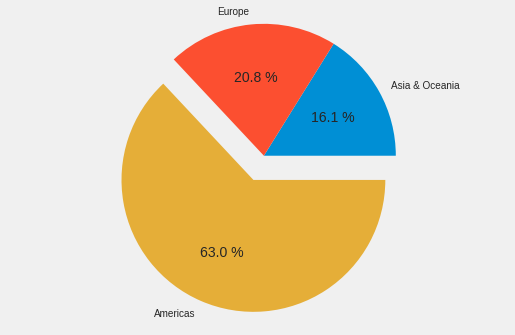

In [244]:
x = np.array(df1.groupby(['Region'])['Import in tonnes'].sum())
desfase = [0,0,0.2]
plt.pie(x, labels=df1['Region'].unique(), autopct="%0.1f %%", explode=desfase)
# plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis('equal')
plt.show()